# 고속도로 교통량

### 1. 데이터 확인

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

from matplotlib import font_manager, rc
font_path = "C:/KHR/PYDATAexam/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
#교통사고 데이터 로드
df1 = pd.read_csv("20210523교통량.csv", encoding='CP949', header=0)
df2 = pd.read_csv("20210524교통량.csv", encoding='CP949', header=0)
df3 = pd.read_csv("20210525교통량.csv", encoding='CP949', header=0)
df4 = pd.read_csv("20210526교통량.csv", encoding='CP949', header=0)
df5 = pd.read_csv("20210527교통량.csv", encoding='CP949', header=0)
df6 = pd.read_csv("20210528교통량.csv", encoding='CP949', header=0)
df7 = pd.read_csv("20210529교통량.csv", encoding='CP949', header=0)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

In [3]:
# 데이터 확인
df = df[['집계일자', '집계시', '교통량']]
display(df)

,집계일자,집계시,교통량
0,20210523,0,305
1,20210523,0,346
2,20210523,0,-1
3,20210523,0,253
4,20210523,0,352
...,...,...,...
34663,20210529,23,166
34664,20210529,23,384
34665,20210529,23,142
34666,20210529,23,357


### 2. 데이터 전처리

In [4]:
# -1값을 가진 행 삭제
df = df.loc[df.교통량>0, :]
display(df)

,집계일자,집계시,교통량
0,20210523,0,305
1,20210523,0,346
3,20210523,0,253
4,20210523,0,352
5,20210523,0,312
...,...,...,...
34663,20210529,23,166
34664,20210529,23,384
34665,20210529,23,142
34666,20210529,23,357


In [5]:
# 집계시 groupby - 시간대에 따른 교통량
df_group = df.groupby('집계시')
hour = []
total = []
for key, group in df_group :
    hour.append(key)
    total.append(group['교통량'].sum())
df_volumn = pd.DataFrame({'시간대':hour, '교통량':total})

In [6]:
display(df_volumn)

,시간대,교통량
0,0,3014408
1,1,2185227
2,2,1871714
3,3,1957164
4,4,2916710
5,5,6461341
6,6,10650671
7,7,13073502
8,8,13926100
9,9,14890124


### 3. 시각화

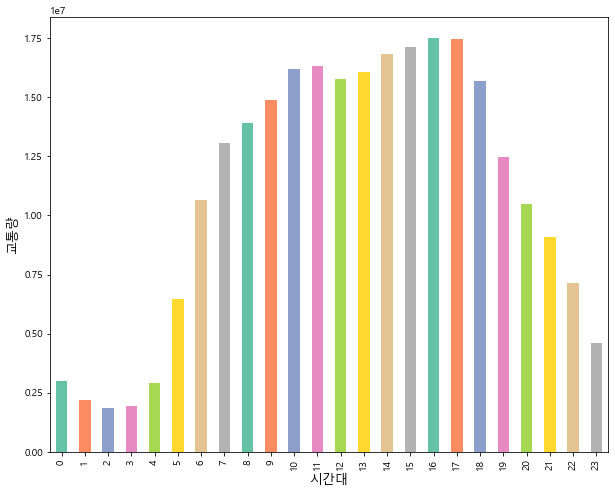

In [12]:
mycolors = sns.color_palette('Set2',len(df_volumn['시간대']))

plt.figure(figsize=(10,8))
df_volumn['교통량'].plot(kind='bar', color=mycolors )
plt.xlabel('시간대', size=13)
plt.ylabel('교통량', size=13)
#plt.title('시간대에 따른 고속도로 교통량', size=15)

plt.savefig("시간대에_따른_고속도로_교통량.png") 